# Visualize and optimize

In [47]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,SubjID,actHrs,psqiHrs,delta
0,562,5.88,5.92,0.03
1,2541,5.53,7.00,1.47
2,2542,6.32,5.83,-0.49
3,2571,6.03,5.83,-0.19
4,2572,6.40,7.33,0.93


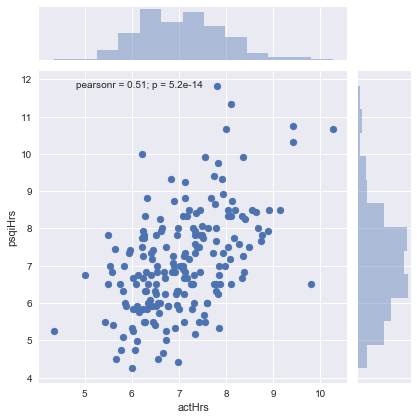

In [2]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as ss
%matplotlib inline

ss.set(color_codes=True)
#ss.distplot(df["actigraphyHrs"], bins=20, kde=False, rug=True);
ss.jointplot(x="actHrs", y="psqiHrs", data=df)

In [131]:
def split_error(df, lo, hi):
    actHrs = df[['actHrs']].values # extract as numpy array
    actHrs = actHrs[~pd.isnull(actHrs)] # remove NaNs
    psqiHrs = df[['psqiHrs']].values 
    psqiHrs = psqiHrs[~pd.isnull(psqiHrs)]
    
    if lo < max(actHrs.min(),psqiHrs.min()):
        lo = max(actHrs.min(),psqiHrs.min())
    
    if hi > min(actHrs.max(),psqiHrs.max()):
        hi = min(actHrs.max(),psqiHrs.max())
    
    loErr = abs(sum(actHrs <= lo) - sum(psqiHrs <= lo))
    hiErr = abs(sum(actHrs >= hi) - sum(psqiHrs >= hi))
    sumErr = loErr + hiErr
    return sumErr

split_error(df,5,10)

12

In [133]:
x = pd.Series(range(4,13))
y = pd.Series(range(4,13))

results = pd.DataFrame(0, index = x, columns = y)
for i in x:
    for j in y:
        results.iloc[i-4,j-4] = split_error(df,i,j)
        
results

,4,5,6,7,8,9,10,11,12
4,4,11,26,2,14,8,5,5,5
5,11,18,33,9,21,15,12,12,12
6,31,38,53,29,41,35,32,32,32
7,11,18,33,9,21,15,12,12,12
8,16,23,38,14,26,20,17,17,17
9,16,23,38,14,26,20,17,17,17
10,12,19,34,10,22,16,13,13,13
11,10,17,32,8,20,14,11,11,11
12,8,15,30,6,18,12,9,9,9


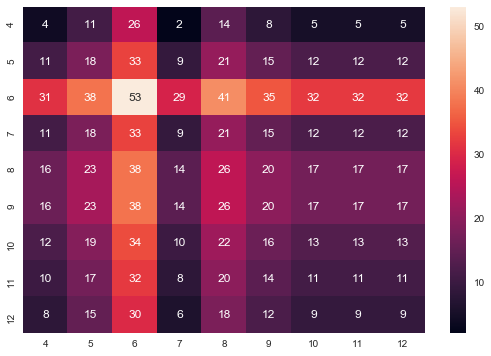

In [135]:
f, ax = plt.subplots(figsize=(9,6))
ss.heatmap(results, annot=True, fmt="d")